In [38]:
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv("C:\\Users\\gajendra singh\\OneDrive\\Desktop\\pandas\\PowerBI-Datasets-main\\zomato.csv", encoding='latin-1')

In [40]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [51]:
df.info()
df['Rating color'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

In [43]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\gajendra
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Text(0.5, 1.0, 'Zomato Review Ratings')

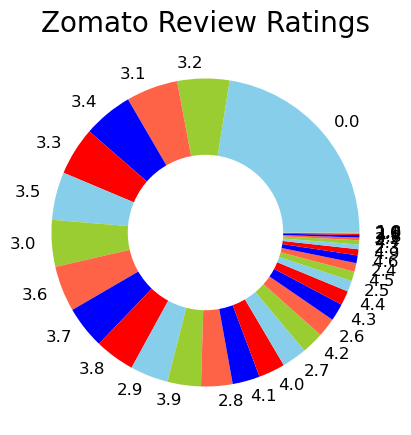

In [44]:
ratings = df["Aggregate rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ['skyblue', 'yellowgreen', 'tomato', 'blue', 'red']
plt.figure(figsize=(5,5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0,0), 0.5, color='white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('Zomato Review Ratings', fontsize=20)

In [50]:
sentiments = SentimentIntensityAnalyzer()
df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in df['Rating text']]
df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in df['Rating text']]
df['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in df['Rating text']]
print(df.tail())

      Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730              NamlÛ± Gurme           208  ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208  ÛÁstanbul   
9548        5915807                     Huqqa           208  ÛÁstanbul   
9549        5916112              Aôôk Kahve           208  ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208  ÛÁstanbul   

                                                Address     Locality  \
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...     Karakí_y   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...    Koôuyolu   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karakí_y, ÛÁstanbul  28.977392  41.022793   
9547    Koôuy

In [48]:
x = sum(df['Positive'])
y = sum(df['Negative'])
z = sum(df['Neutral'])

def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("Positive 😘")
    elif(b>a) and (b>c):
        print("Negative 🤬")
    else: 
        print("Neutral 🫡")
sentiment_score(x,y,z)

Neutral 🫡


In [49]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  3223.1980000000344
Negative:  186.0
Neutral:  6141.802000000091


In [59]:
desired_color = 'White'  # Replace with the color you're interested in

# Filter the DataFrame based on the desired color
filtered_reviews = df[df['Rating color'] == desired_color]

# Display the reviews with the chosen color
print(filtered_reviews)

      Restaurant ID         Restaurant Name  Country Code            City  \
30          6600060          Sandubas Cafí©            30       Brasí_lia   
58          7305048   Quiosque Chopp Brahma            30  Rio de Janeiro   
69          6710645        Cantinho da Gula            30      Sí£o Paulo   
77          6701419           Divino Fogí£o            30      Sí£o Paulo   
78          6703956             Super Grill            30      Sí£o Paulo   
...             ...                     ...           ...             ...   
9109       18277023           Bread & Pasta             1           Noida   
9110       18313203           Chillies Cafe             1           Noida   
9111       18254559                Platters             1           Noida   
9112       18255132               The Grand             1           Noida   
9351       18273002  Damascena Coffee House           215      Birmingham   

                                                Address  \
30    Edifí_cio 

In [60]:
# Red = Poor
# Orange = Average
# White = Not rated
# Yellow = Good
# Green = Very Good
# Dark Green = Excellent


In [62]:
desired_sentiment = ['Poor', 'Average', 'Not rated', 'Good', 'Very Good', 'Excellent']

color_to_sentiment = {
    'Red':'Poor',
    'Orange': 'Average',
    'White': 'Not rated',
    'Yellow': 'Good',
    'Green': 'Very Good',
    'Dark Green': 'Excellent'
}

filtered_reviews = df[df['Rating color'].map(color_to_sentiment).isin(desired_sentiment)]

print(filtered_reviews)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                           